# Task 1
# Bayes filter

At the beginning of the room there is a mobile robot with coordinate 0. The length of the room is known. The robot moves along one direction in cells 1 meter wide. The actuators of the robot are not ideal, and slippage is also present. As a result, the robot moves to the given cell with a probability of 40%, to the one next to it with a probability of 20%, and 10% through one from it. The histogram of the error is shown below.

<BarContainer object of 5 artists>

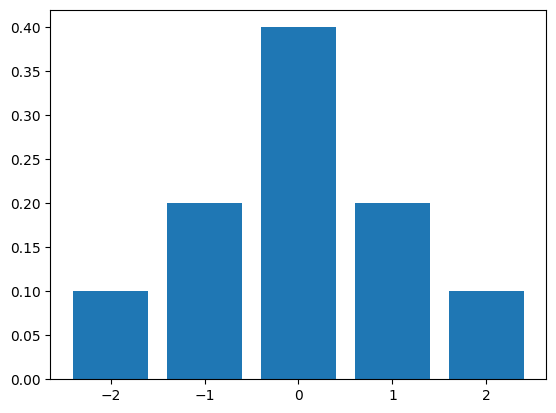

In [1]:
import matplotlib.pyplot as plt
import numpy as np

robot_errors = [-2, -1, 0, 1, 2]
robot_prob = [0.1, 0.2, 0.4, 0.2, 0.1]
plt.bar(robot_errors, robot_prob)

The position of the robot is measured by a sensor with a normal error distribution. The mathematical expectation of the sensor readings corresponds to the position of the robot. The sensor error distribution is shown below.

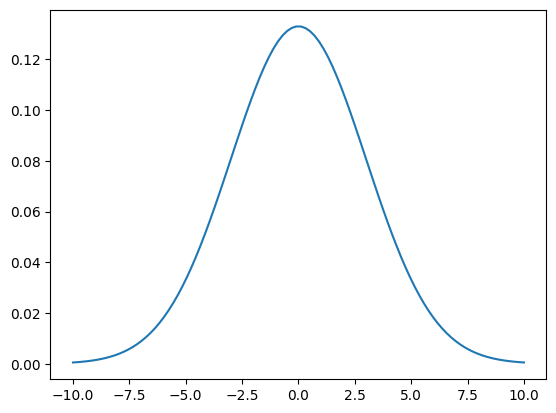

In [9]:
mu = 0
sigma = 3
x = np.linspace(-10, 10, 100)
p1 = (2 * np.pi * (sigma ** 2)) ** (-0.5) * np.exp(-0.5 * np.power( x - mu, 2)/ (sigma ** 2))
plt.plot(x, p1)


The robot moves to an arbitrarily given cell $N$. Then it measures the position with a sensor and applies a Bayesian filter to refine its position (the robot can request these positions as many times as needed).

In [14]:
from matplotlib.animation import FuncAnimation

class robot:
    def __init__(self, cur = None, N = 0, length = 100, sigma = 3):
        if cur is None:
            self.cur = int(length/2)
        else:
            self.cur = cur
        self.sigma = sigma
        self.robot_errors_org = np.array([-2, -1, 0, 1, 2])
        self.robot_errors = np.array([-2, -1, 0, 1, 2])
        self.robot_prob = np.array([0.1, 0.2, 0.4, 0.2, 0.1])
        self.N = N
        self.length = length
        self.prior = np.zeros(length)
        self.robot_errors = self.robot_errors+self.cur
        self.prior[self.robot_errors] =self.robot_prob
        self.posteriors = [self.prior]

    def move(self, u):
        post = np.zeros_like(self.prior)
        for i in range(-2,3):
            for j in range(3+u,self.length-3+u):
                post[j] += self.robot_prob[i+2]*self.prior[j-u-i]
        post = post/np.sum(post)
        self.prior = post
        self.posteriors.append(post)
        return post

    def __p_gause(self, mu = 0):
        sigma = self.sigma
        x = np.arange(-int(self.length/2), int(self.length/2))
        p = (2 * np.pi * (sigma ** 2)) ** (-0.5) * np.exp(-0.5 * np.power( x - mu, 2)/ (sigma ** 2))
        self.measure = p
        return p
    
    def bayes(self, measure):
        mul =  self.prior*self.__p_gause(measure)
        self.prior = mul/np.sum(mul)
        posterior = self.prior
        self.posteriors.append(posterior)
        
    def show(self, name = "Nothing"):
        fig, ax = plt.subplots()                    
        ax.set(xlim=(-self.length, self.length), ylim=(0, np.max(self.posteriors)), title='Moving')
        ax.set_xlabel("x")
        ax.set_ylabel("p(x)")
        self.line, = ax.plot([], [], lw=3)
        anim = FuncAnimation(fig, self.animate, init_func=self.init, frames=20, interval=80, blit=True)
        anim.save(name+'.gif', writer='matplotlib.animation.PillowWriter')

    def init(self):
        self.line.set_data([], [])
        return self.line,

    def animate(self, i):
        self.line.set_data(np.linspace(-int(self.length/2), int(self.length/2), self.length), self.posteriors[i])
        return self.line,


def generate_moves(n_moves):
    mat = np.zeros(n_moves)
    for i in range(n_moves):
        mat[i] = np.random.randint(-2,2)
    return mat

def movements_demo(save = False):
    myrobot = robot(length = 100)
    moves = generate_moves(1000)
    for move in moves:
        myrobot.move(int(move))
    if save:
        myrobot.show("moving")

def generate_measures(n_measures):
    mat = np.zeros(n_measures)
    for i in range(n_measures):
        mat[i] = np.random.randint(-2,2)
    return mat

def measurements_demo(sigma = 3,N = 40, save = False):
    measures = generate_measures(N)
    myrobot = robot(length = 20, sigma = sigma)
    maxes = []
    for i in range(len(measures)):
        myrobot.bayes(measures[i])
        maxes.append(max(myrobot.posteriors[-1]))
    if save:
        myrobot.show("meas")
    return maxes

def move_measure(sigma = 3,N = 1000, save = False):
    myrobot = robot(length = 50, sigma = sigma)
    measures = generate_measures(N)
    moves = generate_moves(N)
    maxes = []
    ac_sum = 0
    for i in range(N):
        ac_sum += moves[i]
        myrobot.move(int(moves[i]))
        myrobot.bayes(ac_sum)
        maxes.append(np.max(myrobot.posteriors[-1]))
    if save:
        myrobot.show("move_measure")
    return maxes
#measurements_demo()
#movements_demo()
#move_measure()

In [8]:
movements_demo()

In [11]:
def plot_max_vs_measure(fun):
    plt.figure(figsize = (12,5))
    plt.title("Dependency of maximum probability on measurements")
    N = 1000

    for i in range(1,4):
        maxes = fun(i,N)
        plt.subplot(1,3,i)
        plt.plot(list(range(N)), maxes)
        plt.title(f"sigma = {i}")

/tmp/ipykernel_42022/1482057417.py:39: RuntimeWarning: invalid value encountered in divide
  self.prior = mul/np.sum(mul)
/tmp/ipykernel_42022/3678175663.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,i)


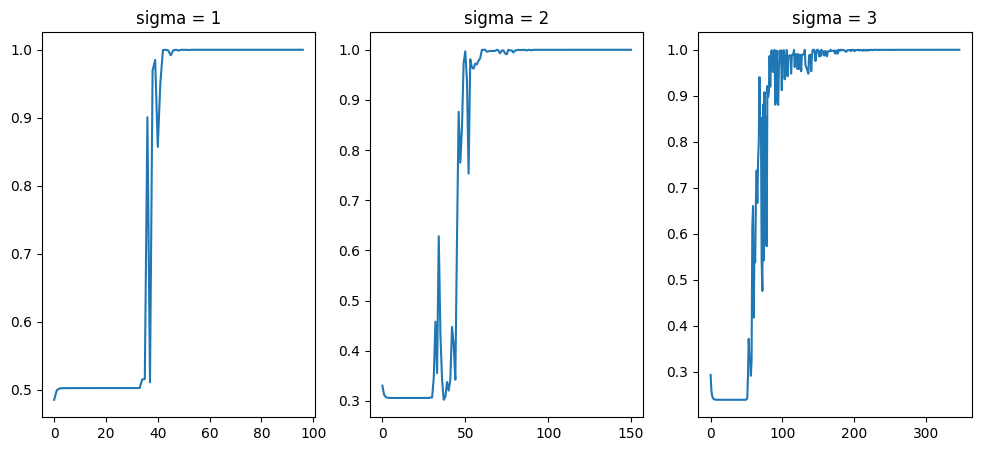

In [12]:
plot_max_vs_measure(move_measure)

## Tasks

- Write a function of robot movement.
- Write a program code that simulates a change of the distribution of the probability density of the robot being in the cells after move.
- Implement a function that imitates the measurement of the position of the robot by a sensor.
- Write a function that implements the Bayesian filter to determine the position of the robot.
- Construct a graph of the dependence of the maximum probability of finding a robot in a cell on the number of measurements.
- Plot the probability density distribution of the position of the robot after multiple measurements.
- Repeat the previous two points for three movements at different standard deviations of the sensor readings.